In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import numpy as np

In [53]:
def get_surface_point(point, R, neighbours, rs):
    dimension = point.size
    # Перейти в координаты с центром в point
    neighbours = neighbours - point
    # Ограничение искомой точки: кубическая окрестность point
    A_external_cub = np.concatenate((np.eye(dimension), -np.eye(dimension)))
    b_external_cub = np.array([R] * 2 * dimension)
    # Основное неравенство
    A_main = neighbours
    sqr_neighbours = np.array(list(map(lambda x: np.dot(x, x), neighbours))) # Квадратат расстояния до point
    sqr_rs = rs ** 2
    b_main = (sqr_neighbours - sqr_rs + R ** 2) / 2
    # Поиск центра масс
    # sum_rs = rs.sum()
    # weighted_neighbours = neighbours * rs.reshape(rs.size, 1)
    # M = weighted_neighbours.sum(0) / sum_rs
    # is_null = all([x == 0 for x in M])
    res = []
    for i in range(R * dimension):
        A_eq = A_external_cub[i:i+1, :]
        b_eq = np.array([R])
        A_ub = np.concatenate((A_external_cub[:i, :], A_external_cub[i+1:, :], A_main))
        b_ub = np.concatenate(([R] * (2 * dimension - 1), b_main))
        c = np.zeros(dimension)# if is_null else M
        #c = np.ones(dimension)
        res_i = linprog(c, A_ub = A_ub, b_ub = b_ub, A_eq = A_eq, b_eq = b_eq, bounds = (None, None))
        if res_i.status == 0:
            x = res_i.x
            ro = np.dot(x, x) ** (1 / 2)
            x = x * (R / ro)
            res.append(x + point)
    return res

In [54]:
point = np.array([0, 0])
R = 2
neighbours = np.array([[4.5, 0], [-5, 0], [0, -4.5], [0, 4.5]], float)
rs = np.array([4, 3, 3, 3], float)
res = get_surface_point(point, R, neighbours, rs)
print(len(res))

1


(-10.0, 10.0, -10.0, 10.0)

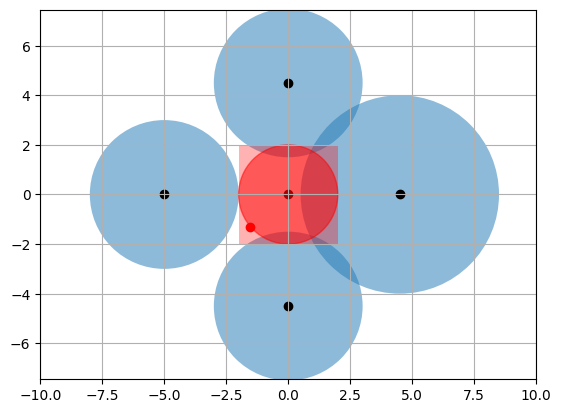

In [55]:
fig, ax = plt.subplots()
plt.axis("equal")
plt.grid()
for xyz, r in zip(neighbours, rs):
    c = plt.Circle (xyz, radius = r, alpha = 0.5)
    plt.gca().add_artist(c)
    plt.scatter(*xyz, color = "black")
plt.scatter(*point, color = "black")
for x in res:
    plt.scatter(*x, color = "red")
c = plt.Circle(point, radius = R, color = "red", alpha = 0.5)
plt.gca().add_artist(c)
plt.gca().add_patch(plt.Rectangle((point[0]-R, point[1]-R), 2 * R, 2 * R, facecolor = "red", alpha = 0.3))
plt.axis([-10, 10, -10, 10])